In [15]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Importing the mall dataset with pandas
dataset = pd.read_csv('5_ind_var_beer.csv')

In [19]:
df = dataset.drop(columns=['Unnamed: 0', 'ibu_Min', 'brewery_name', 'review_time'])


In [20]:
df

,ibu_Max,beer_abv,review_overall
0,40,5.0,5.0
1,40,5.0,4.5
2,40,4.2,4.5
3,40,3.8,3.5
4,40,3.8,3.5
...,...,...,...
709193,35,4.0,3.5
709194,35,4.0,4.0
709195,35,5.4,3.5
709196,35,5.4,3.5


In [21]:
X = df.iloc[:, [0,1]].values

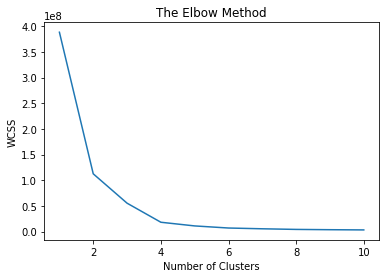

In [22]:
# using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
# Applying k-means to mall dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

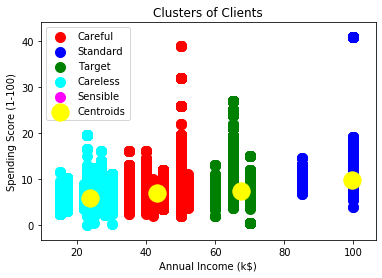

In [24]:
# Visualizing the Clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()